Sample Data

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import os

In [2]:
class_names = ['Car', 'Motorcycle', 'Truck', 'Bus', 'Bicycle']

In [3]:
def draw_bbox(image_path, annotation_path , class_names):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape

    # Read YOLO annotations
    with open(annotation_path, 'r') as file:
        lines = file.readlines()

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for line in lines:
        class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.strip().split())

        # Convert YOLO format to bounding box
        x_center *= width
        y_center *= height
        bbox_width *= width
        bbox_height *= height

        x_min = x_center - bbox_width / 2
        y_min = y_center - bbox_height / 2

        # Create a Rectangle patch
        rect = patches.Rectangle((x_min, y_min), bbox_width, bbox_height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Add class label
        plt.text(x_min, y_min, class_names[int(class_id)], color='white', fontsize=12, backgroundcolor='red')

    plt.show()


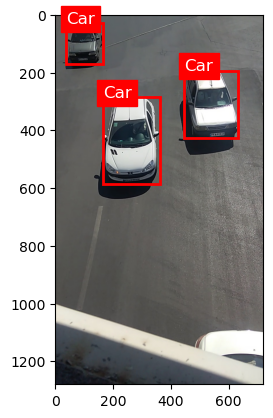

In [4]:
image_path = './dataset/images/train/160.jpg'
annotation_path = './dataset/labels/train/160.txt'
draw_bbox(image_path, annotation_path, class_names)

## Training

In [5]:
os.environ['WANDB_MODE'] = 'disabled'
cwd = os.getcwd() ## Current Path
model = YOLO('yolov8l.pt')
results = model.train(data=os.path.join(cwd, "dataset","data.yaml"), epochs=1000, imgsz=640, batch = 8)

100%|██████████| 83.7M/83.7M [00:08<00:00, 10.6MB/s]


New https://pypi.org/project/ultralytics/8.2.42 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 2060, 5927MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/tanub/work/Vehicle-Tracking/YOLO/dataset/data.yaml, epochs=1000, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retin

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home/tanub/work/Vehicle-Tracking/YOLO/dataset/labels/train.cache... 1142 images, 54 backgrounds, 1 corrupt: 100%|██████████| 1196/1196 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/tanub/work/Vehicle-Tracking/YOLO/dataset/images/train/178.jpg: ignoring corrupt image/label: negative label values [  -0.017969]



val: Scanning /home/tanub/work/Vehicle-Tracking/YOLO/dataset/labels/val.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      5.83G     0.8528      1.386       1.13          9        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]

                   all        117        285      0.728      0.696      0.779      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000       5.6G     0.8539     0.9712      1.116         19        640: 100%|██████████| 150/150 [01:09<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        117        285      0.678       0.63      0.706      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      5.63G     0.9141      1.033      1.153         12        640: 100%|██████████| 150/150 [01:11<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        117        285      0.575      0.609      0.658       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      5.61G     0.9818      1.037      1.166         13        640: 100%|██████████| 150/150 [01:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.25it/s]

                   all        117        285      0.502      0.409      0.429      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      5.62G      1.019      1.082      1.214         24        640: 100%|██████████| 150/150 [01:10<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        117        285      0.691       0.47      0.589      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      5.63G      1.029      1.072      1.218         21        640: 100%|██████████| 150/150 [01:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        117        285      0.738      0.459      0.569      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      5.44G      1.009      1.038      1.217         12        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]

                   all        117        285      0.539      0.493      0.517      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000       5.6G      1.017      1.028      1.225         18        640: 100%|██████████| 150/150 [01:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all        117        285      0.689      0.471      0.526      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      5.62G      1.016      1.056      1.229          7        640: 100%|██████████| 150/150 [01:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        117        285      0.434      0.535      0.544      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      5.61G     0.9886     0.9917      1.195          8        640: 100%|██████████| 150/150 [01:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        117        285      0.445      0.582      0.557      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      5.46G      1.003      1.005      1.219          8        640: 100%|██████████| 150/150 [01:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.53it/s]

                   all        117        285      0.506      0.597      0.556      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      5.63G     0.9833     0.9613      1.209         20        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        117        285      0.523      0.623        0.6      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      5.62G     0.9798     0.9477      1.203         26        640: 100%|██████████| 150/150 [01:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        117        285       0.51      0.613      0.596      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      5.61G     0.9864     0.9547      1.219         10        640: 100%|██████████| 150/150 [01:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        117        285      0.755      0.522      0.575      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      5.45G     0.9669     0.9443      1.207         10        640: 100%|██████████| 150/150 [01:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.53it/s]

                   all        117        285      0.713       0.43       0.53      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000       5.6G     0.9781     0.9546      1.208         11        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        117        285      0.755      0.456      0.564      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      5.61G     0.9463     0.8905      1.194         10        640: 100%|██████████| 150/150 [01:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        117        285      0.604      0.582      0.647      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      5.61G     0.9396     0.8722      1.181         20        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]

                   all        117        285      0.663      0.486      0.581      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      5.44G     0.9543     0.8969       1.19          5        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.53it/s]

                   all        117        285      0.588      0.585      0.573      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      5.61G     0.9278     0.8801      1.187         12        640: 100%|██████████| 150/150 [01:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all        117        285      0.781       0.61      0.659      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      5.61G     0.9279      0.869      1.182          7        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]

                   all        117        285        0.6      0.582      0.634      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      5.61G     0.9229      0.831       1.17         10        640: 100%|██████████| 150/150 [01:09<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]

                   all        117        285      0.778      0.555      0.631      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      5.44G     0.9222     0.8539      1.175         16        640: 100%|██████████| 150/150 [01:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        117        285      0.724      0.572      0.623      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000       5.6G      0.882      0.823       1.16          9        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        117        285      0.616      0.627      0.672      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000       5.6G     0.8996     0.8221       1.17          7        640: 100%|██████████| 150/150 [01:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        117        285      0.594      0.601      0.666      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      5.62G     0.9067     0.8406      1.169         13        640: 100%|██████████| 150/150 [01:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]

                   all        117        285      0.638      0.655       0.64      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      5.44G     0.8893     0.8014      1.155         15        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        117        285      0.587      0.629      0.672      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      5.61G     0.8752     0.7916      1.148         12        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        117        285      0.797       0.62       0.72      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      5.61G     0.8791     0.7937      1.157         17        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.52it/s]

                   all        117        285       0.85      0.558       0.66      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      5.61G     0.8541     0.7421      1.137         32        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        117        285      0.675      0.641      0.678      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      5.44G     0.8677     0.7712       1.14          6        640: 100%|██████████| 150/150 [01:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        117        285      0.585      0.634       0.61       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      5.61G     0.8635     0.7553      1.141         11        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        117        285      0.646      0.629      0.629      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      5.61G     0.8655     0.7505      1.136         12        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        117        285      0.636      0.656      0.688      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      5.61G     0.8501     0.7468      1.134          8        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.54it/s]

                   all        117        285      0.701      0.657      0.692      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      5.46G     0.8453     0.7283      1.125         15        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        117        285      0.803       0.63      0.718      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      5.62G     0.8571     0.7435      1.141         10        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        117        285      0.688      0.632      0.707      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      5.63G     0.8285     0.7115      1.117         14        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        117        285      0.694      0.612      0.696      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      5.61G     0.8295     0.7023      1.113          4        640: 100%|██████████| 150/150 [01:09<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        117        285      0.701      0.628      0.679      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      5.46G     0.8204      0.693      1.114         17        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.52it/s]

                   all        117        285      0.859      0.544      0.692      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      5.61G      0.834      0.687      1.118         21        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.54it/s]

                   all        117        285      0.643       0.65      0.679      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000       5.6G     0.8337     0.6963       1.12          8        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        117        285       0.66      0.665      0.697      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      5.61G     0.8207      0.657      1.103         13        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        117        285      0.535      0.683      0.663      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      5.44G     0.8103     0.6753      1.104         14        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.54it/s]

                   all        117        285      0.839      0.564      0.695      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      5.62G     0.8078     0.6539      1.103          5        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        117        285      0.779      0.565      0.683      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      5.61G     0.8225     0.6833      1.116          9        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all        117        285      0.663      0.593       0.67      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000       5.6G     0.8015      0.662      1.106         20        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        117        285      0.768      0.585        0.7      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      5.44G     0.8191     0.6545      1.112         12        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.52it/s]

                   all        117        285      0.736      0.623      0.711      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      5.61G     0.8062     0.6472      1.108         10        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        117        285       0.61      0.692      0.675      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000       5.6G     0.8066     0.6488      1.102          9        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]

                   all        117        285      0.873      0.498      0.679      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000       5.6G     0.7811     0.6315      1.072         20        640: 100%|██████████| 150/150 [01:09<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        117        285      0.713      0.599      0.678      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      5.45G      0.785     0.6255       1.09         16        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        117        285      0.805      0.549       0.64      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000       5.6G     0.7634     0.6038      1.084         22        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]

                   all        117        285      0.794      0.513      0.652      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      5.61G     0.7796     0.6241      1.082         12        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        117        285      0.728      0.564      0.677      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      5.61G     0.7768     0.6204      1.092         14        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.52it/s]

                   all        117        285      0.689      0.608      0.683      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      5.46G     0.7709     0.6239      1.086          9        640: 100%|██████████| 150/150 [01:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        117        285        0.7      0.682      0.711      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      5.62G     0.7747     0.6237      1.085         19        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        117        285      0.913      0.608      0.732      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      5.61G     0.7456     0.5948      1.063         13        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.52it/s]

                   all        117        285      0.805      0.671      0.721      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      5.61G     0.7663     0.6152      1.078         20        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        117        285       0.71      0.576      0.691      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      5.45G     0.7649     0.6063      1.082         19        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        117        285      0.823      0.593      0.712      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      5.61G     0.7591      0.607      1.067         18        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.54it/s]

                   all        117        285      0.803       0.58      0.659      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      5.61G     0.7502     0.5991       1.07         14        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all        117        285      0.692      0.632      0.679      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      5.61G     0.7314     0.5642      1.058         18        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        117        285      0.721      0.639      0.695      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      5.45G     0.7551     0.5956      1.082         20        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        117        285      0.776      0.652      0.701       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      5.62G     0.7501      0.579      1.065         17        640: 100%|██████████| 150/150 [01:09<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        117        285      0.774      0.602      0.683      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      5.61G     0.7333     0.5721      1.063          8        640: 100%|██████████| 150/150 [01:09<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        117        285      0.708      0.579      0.676      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      5.61G     0.7309     0.5817      1.069         17        640: 100%|██████████| 150/150 [01:09<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        117        285      0.626      0.635       0.68        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      5.45G     0.7518      0.575      1.075         10        640: 100%|██████████| 150/150 [01:09<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.55it/s]

                   all        117        285      0.794      0.568      0.701      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      5.62G     0.7347     0.5512      1.052         17        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        117        285      0.659      0.715      0.707      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      5.61G      0.741     0.5735      1.063          8        640: 100%|██████████| 150/150 [01:10<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]

                   all        117        285      0.746      0.697      0.724      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      5.61G     0.7155     0.5543      1.045         12        640: 100%|██████████| 150/150 [01:13<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]

                   all        117        285      0.738       0.64      0.682      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      5.46G     0.7238     0.5461      1.044         10        640: 100%|██████████| 150/150 [01:13<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        117        285      0.668      0.641      0.653      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      5.62G     0.7191     0.5707      1.061         16        640: 100%|██████████| 150/150 [01:13<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.21it/s]

                   all        117        285      0.593      0.633      0.653      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      5.61G      0.721      0.546      1.048         13        640: 100%|██████████| 150/150 [01:13<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]

                   all        117        285      0.738      0.656      0.695       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      5.62G     0.7314      0.542      1.062          9        640: 100%|██████████| 150/150 [01:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.52it/s]

                   all        117        285        0.8      0.598      0.698      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      5.44G     0.7245     0.5496      1.061          6        640: 100%|██████████| 150/150 [01:08<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]

                   all        117        285      0.718      0.689      0.736      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000       5.6G     0.7137     0.5408      1.057         16        640: 100%|██████████| 150/150 [01:11<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]

                   all        117        285      0.723      0.629      0.709       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      5.61G     0.7042     0.5325       1.05         17        640: 100%|██████████| 150/150 [01:11<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]

                   all        117        285      0.738      0.642      0.707       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000       5.6G     0.7111     0.5431      1.056          5        640: 100%|██████████| 150/150 [01:11<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]

                   all        117        285       0.76      0.665      0.716      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      5.44G     0.7005     0.5303      1.041         12        640: 100%|██████████| 150/150 [01:11<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        117        285      0.726      0.675      0.724      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000       5.6G     0.7024     0.5348      1.049         10        640: 100%|██████████| 150/150 [01:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.52it/s]

                   all        117        285      0.767      0.603      0.692      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      5.61G      0.693     0.5235      1.041          7        640: 100%|██████████| 150/150 [01:07<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.57it/s]

                   all        117        285      0.764      0.617      0.685      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      5.61G     0.7134     0.5317      1.048         25        640: 100%|██████████| 150/150 [01:07<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]

                   all        117        285      0.747      0.689       0.74      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      5.46G     0.6898     0.5027      1.031         20        640: 100%|██████████| 150/150 [01:07<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.57it/s]

                   all        117        285      0.736      0.675      0.717      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      5.62G     0.6894     0.5103      1.041          5        640: 100%|██████████| 150/150 [01:07<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.53it/s]

                   all        117        285       0.82      0.658      0.743      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      5.62G     0.6891      0.515      1.027         12        640: 100%|██████████| 150/150 [01:07<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]

                   all        117        285      0.676      0.731      0.723      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000       5.6G     0.6732     0.5084      1.035         15        640: 100%|██████████| 150/150 [01:07<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.61it/s]

                   all        117        285      0.691      0.716      0.734      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      5.45G     0.6786     0.5068      1.033          3        640: 100%|██████████| 150/150 [01:07<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.55it/s]

                   all        117        285      0.704      0.685      0.718      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      5.62G     0.6848     0.4982      1.031          8        640: 100%|██████████| 150/150 [01:07<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.59it/s]

                   all        117        285      0.729      0.733      0.717      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      5.61G     0.6753     0.5166      1.033         13        640: 100%|██████████| 150/150 [01:07<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.58it/s]

                   all        117        285       0.81      0.642      0.735      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      5.61G     0.6608      0.497      1.029         18        640: 100%|██████████| 150/150 [01:07<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.57it/s]

                   all        117        285      0.789      0.622      0.704      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      5.44G     0.6702     0.4908       1.02         15        640: 100%|██████████| 150/150 [01:07<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]

                   all        117        285      0.759      0.586      0.707      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      5.62G     0.6728     0.4894      1.023         12        640: 100%|██████████| 150/150 [01:08<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        117        285      0.822      0.634       0.72      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000       5.6G     0.6718     0.4991       1.03         11        640: 100%|██████████| 150/150 [01:08<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]

                   all        117        285      0.777      0.652      0.729      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000       5.6G     0.6627     0.4839      1.017         18        640: 100%|██████████| 150/150 [01:07<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.53it/s]

                   all        117        285      0.763      0.692      0.735      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      5.44G     0.6657     0.4872      1.029          8        640: 100%|██████████| 150/150 [01:07<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.54it/s]

                   all        117        285      0.727      0.678      0.676      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      5.61G     0.6488      0.476       1.01          9        640: 100%|██████████| 150/150 [01:07<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        117        285      0.772      0.622      0.696      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000       5.6G     0.6596      0.483      1.017         13        640: 100%|██████████| 150/150 [01:07<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]

                   all        117        285      0.811      0.628      0.694      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000       5.6G     0.6606     0.4821      1.017          8        640: 100%|██████████| 150/150 [01:07<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.56it/s]

                   all        117        285      0.686      0.677      0.699      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      5.43G     0.6484     0.4691      1.012          7        640: 100%|██████████| 150/150 [01:08<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.59it/s]

                   all        117        285      0.758      0.644      0.695      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000       5.6G     0.6605     0.4843      1.021         11        640: 100%|██████████| 150/150 [01:08<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.52it/s]

                   all        117        285      0.678       0.72      0.743      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      5.61G     0.6528      0.473      1.028          8        640: 100%|██████████| 150/150 [01:08<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.56it/s]

                   all        117        285      0.766      0.625      0.714       0.53
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



101 epochs completed in 2.041 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 87.6MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 2060, 5927MiB)
Model summary (fused): 268 layers, 43610463 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]


                   all        117        285      0.728      0.696      0.779      0.553
                   Car        117        225      0.854      0.701      0.817      0.627
            Motorcycle        117         19      0.916      0.571        0.9      0.602
                 Truck        117         24      0.625      0.333       0.45       0.33
                   Bus        117          9       0.42          1      0.836      0.672
               Bicycle        117          8      0.826      0.875      0.892      0.534
Speed: 0.2ms preprocess, 15.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train4


## Testing with image

In [6]:
test = './dataset/images/test/img1048.jpg'


0: 640x640 7 Cars, 1 Truck, 52.8ms
Speed: 1.7ms preprocess, 52.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


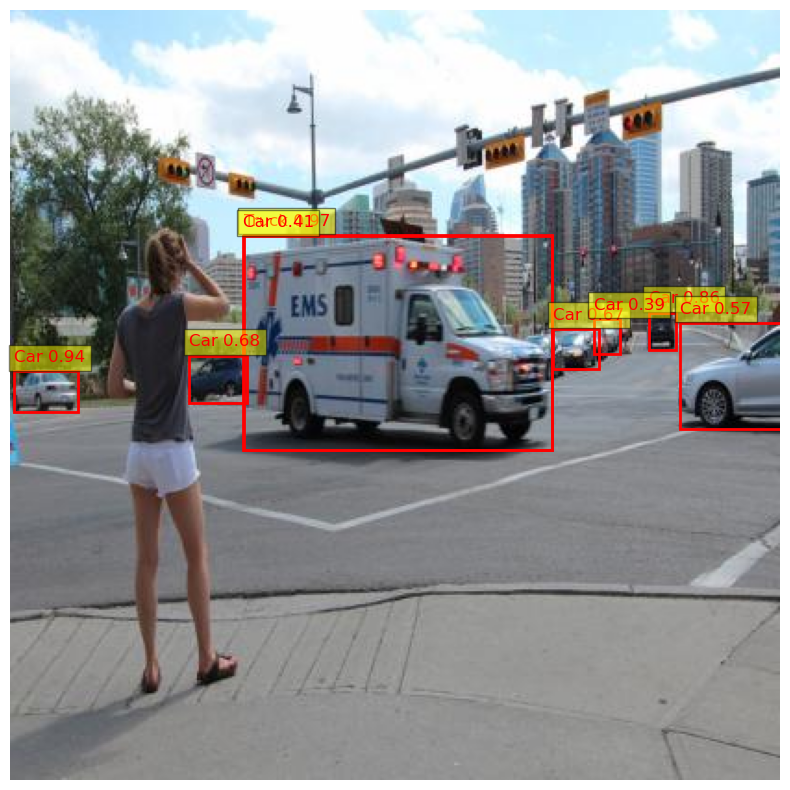

In [7]:
results = model([test])  

def plot_results(img, result):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    # Plot bounding boxes with text
    if result.boxes is not None:
        for i in range(len(result.boxes.xyxy)):
            x1, y1, x2, y2 = result.boxes.xyxy[i].cpu()
            conf = result.boxes.conf[i].cpu()
            
            cls = result.boxes.cls[i].cpu()
            label = f"{model.names[int(cls)]} {conf:.2f}"  # Class label and confidence
            plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', facecolor='none', linewidth=2))
            plt.text(x1, y1 - 5, label, color='red', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))

    plt.axis('off')
    plt.show()

# Process results list
for i, result in enumerate(results):
    # Load the image using OpenCV
    img = cv2.imread(test)
    # Display the result using Matplotlib
    plot_results(img, result)


## Testing with env


0: 384x640 21 Cars, 67.8ms
Speed: 1.7ms preprocess, 67.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


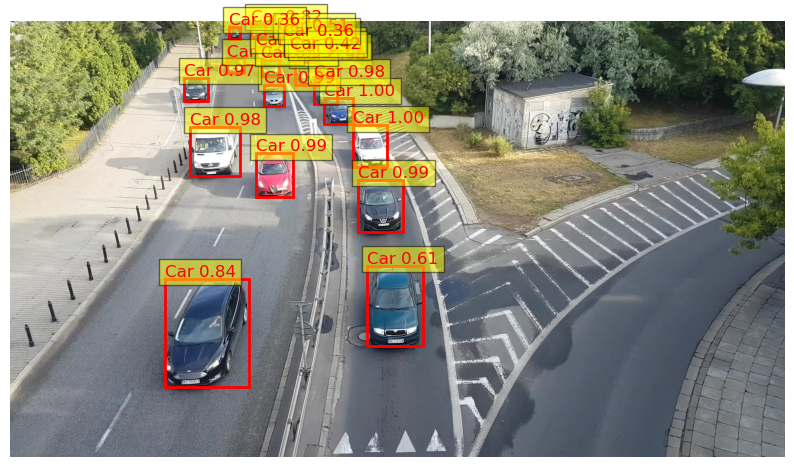

In [8]:
test = './test_img/testing.jpg'
results = model([test])  
# Process results list
for i, result in enumerate(results):
    # Load the image using OpenCV
    img = cv2.imread(test)
    # Display the result using Matplotlib
    plot_results(img, result)